# Análisis y limpieza de datos 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("netflix.csv")



Hola, quiero ver si funciona
p


# Parte 1
¿Cómo ha cambiado la proporción entre películas y series a lo
largo de los años?

<Figure size 1400x600 with 0 Axes>

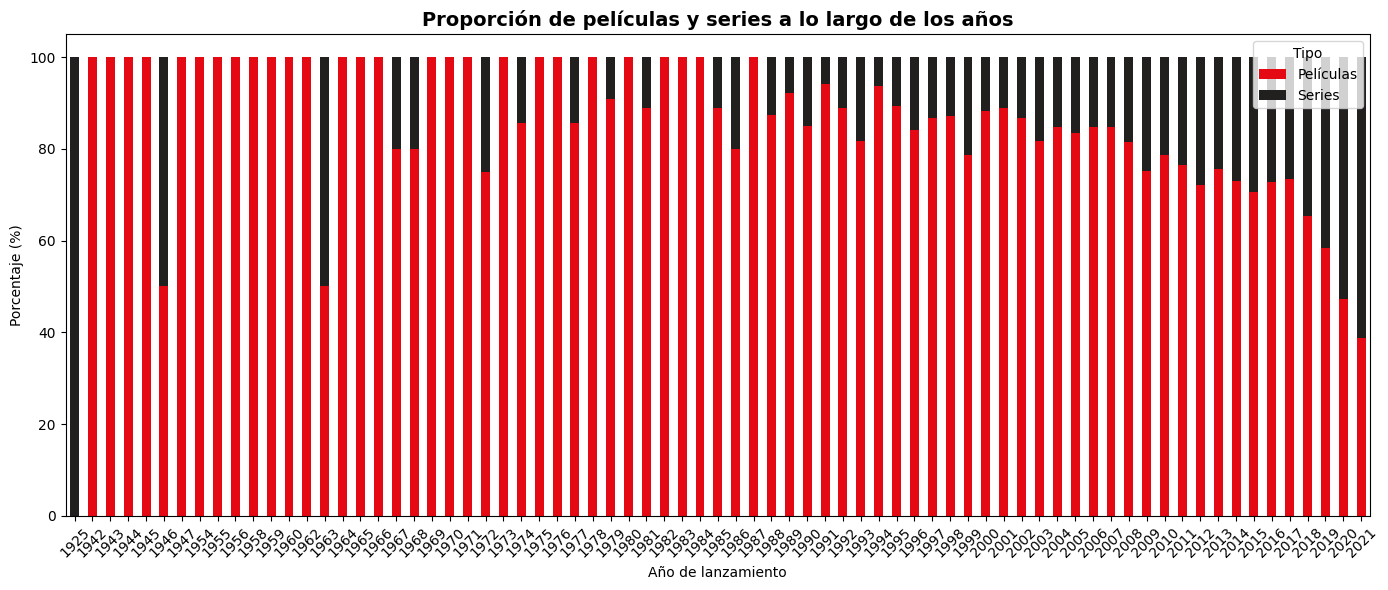

In [ ]:

# Agrupar por año y tipo (Movie / TV Show)
proportion = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Calcular proporción en porcentaje
proportion_percent = proportion.div(proportion.sum(axis=1), axis=0) * 100


colors = ['#e50914', '#221f1f']  

# Graficar proporción de películas y series a lo largo de los años
plt.figure(figsize=(14,6))
proportion_percent.plot(kind="bar", stacked=True, color=colors, figsize=(14,6))

# Títulos y etiquetas
plt.title("Proporción de películas y series a lo largo de los años", fontsize=14, fontweight="bold")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Año de lanzamiento")

# Leyenda
plt.legend(title="Tipo", labels=["Películas", "Series"], loc="upper right")

# Ajuste final
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Parte 2
¿Cómo evolucionó la cantidad de estrenos a lo largo del tiempo
para cada tipo de contenido?

<Figure size 1400x600 with 0 Axes>

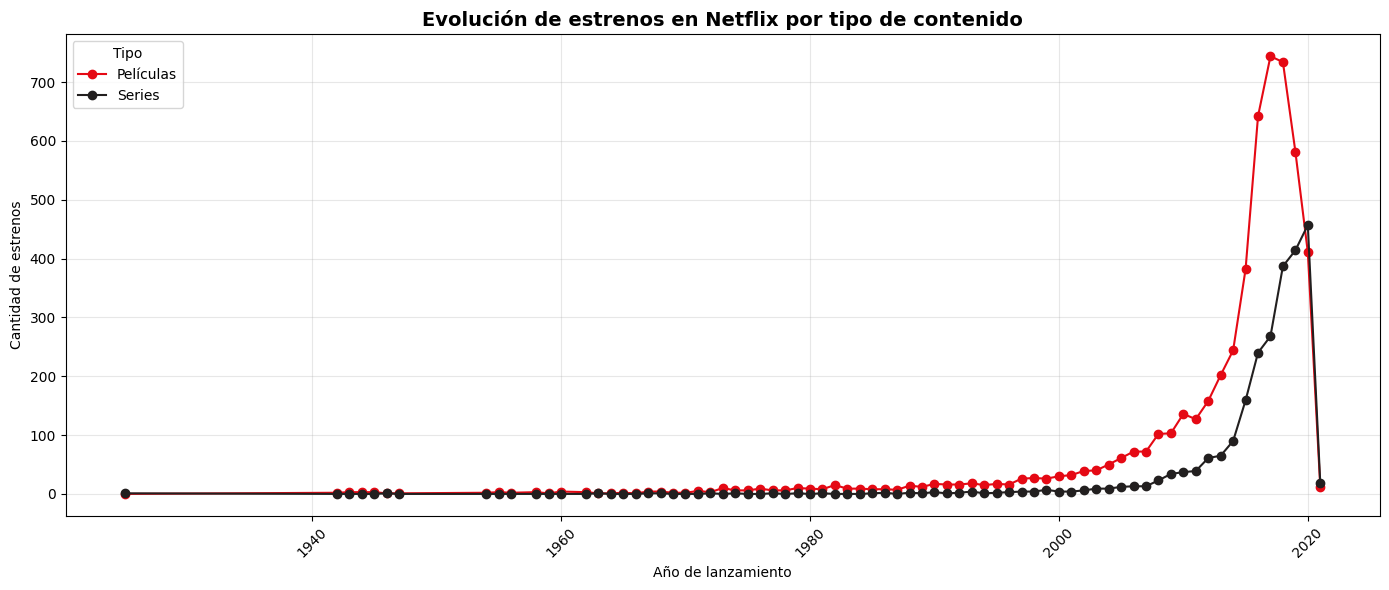

In [5]:
# Agrupar por año y tipo
releases = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)


colors = ['#e50914', '#221f1f']  # Rojo Netflix y negro

# Graficar evolución
plt.figure(figsize=(14,6))
releases.plot(kind="line", marker="o", color=colors, figsize=(14,6))

# Títulos y etiquetas
plt.title("Evolución de estrenos en Netflix por tipo de contenido", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de estrenos")
plt.xlabel("Año de lanzamiento")

# Leyenda
plt.legend(title="Tipo", labels=["Películas", "Series"], loc="upper left")

# Ajuste final
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Parte 3
¿Cuáles son los países con más producciones? ¿Se destacan
más por películas o series?

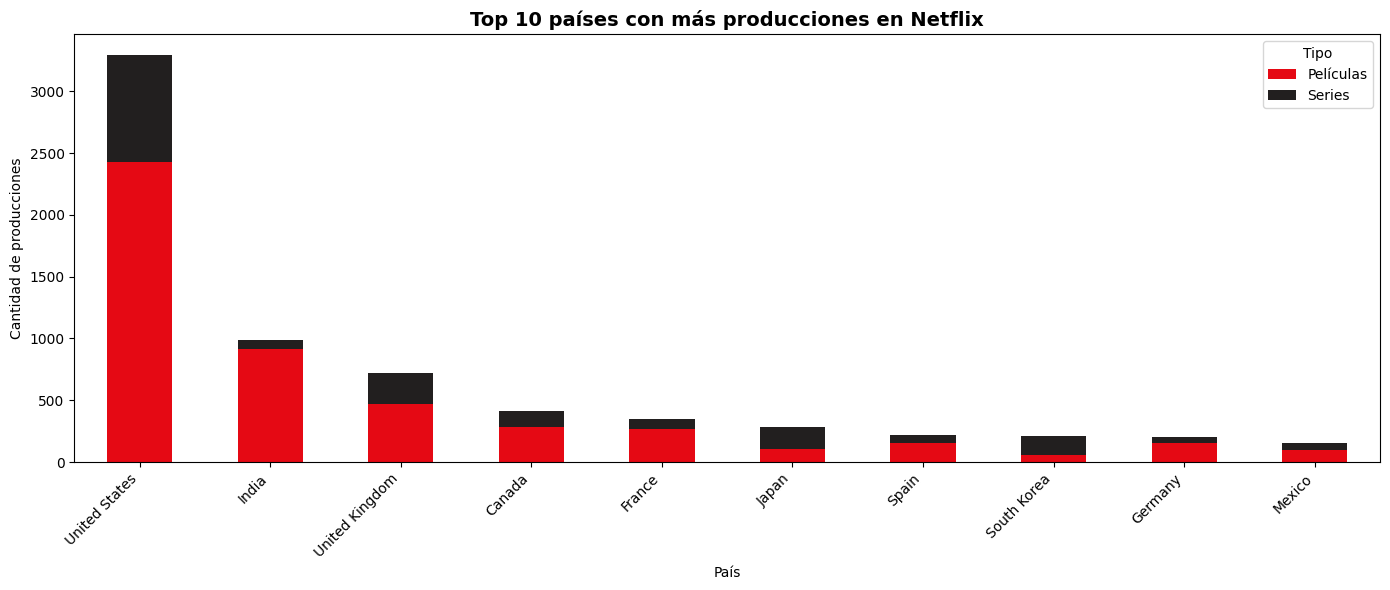

In [6]:
# Dividir múltiples países (algunas filas tienen varios separados por coma)
df['country_split'] = df['country'].str.split(", ")
df_explode = df.explode('country_split')

# Agrupar por país y tipo de contenido
country_counts = df_explode.groupby(['country_split', 'type']).size().unstack(fill_value=0)

# Seleccionar los 10 países con más producciones
top_countries = country_counts.sum(axis=1).sort_values(ascending=False).head(10)
top_countries_data = country_counts.loc[top_countries.index]

# Paleta de colores sugerida
colors = ['#e50914', '#221f1f']

# Gráfico de barras apiladas
top_countries_data.plot(kind="bar", stacked=True, figsize=(14,6), color=colors)

# Títulos y etiquetas
plt.title("Top 10 países con más producciones en Netflix", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de producciones")
plt.xlabel("País")

# Leyenda
plt.legend(title="Tipo", labels=["Películas", "Series"], loc="upper right")

# Ajustes finales
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Parte 4
¿Qué tipo de contenido es más común para cada rating?

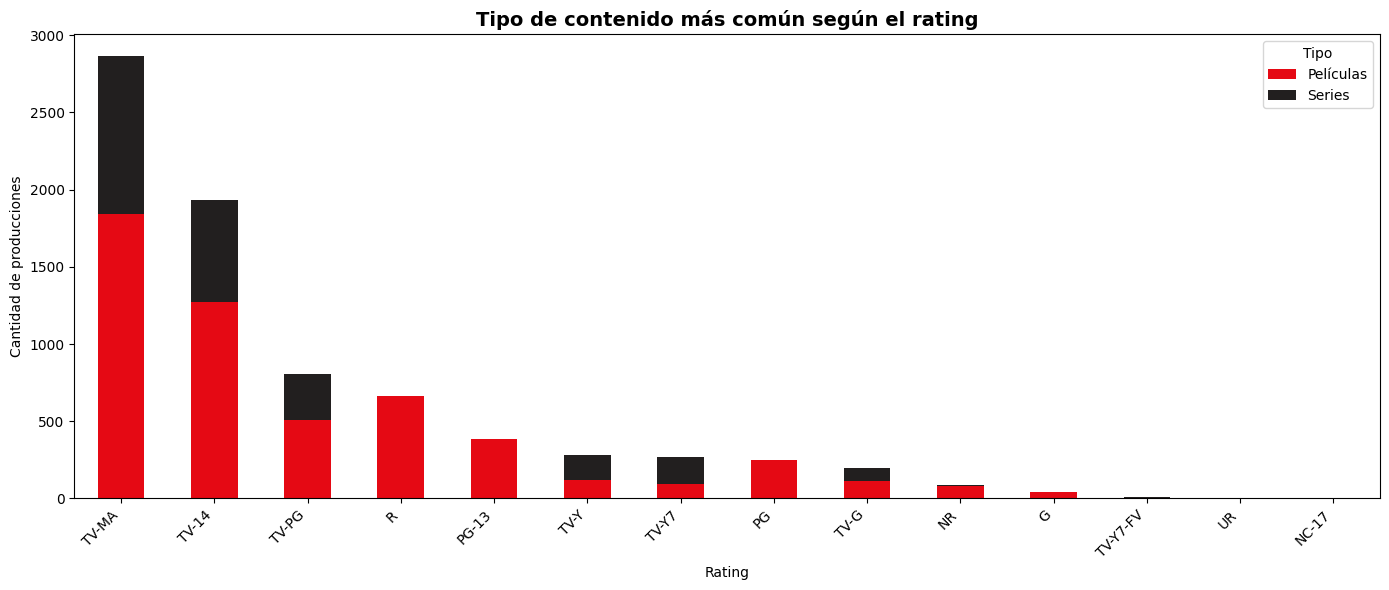

In [12]:
# Agrupar por rating y tipo
rating_counts = df.groupby(['rating', 'type']).size().unstack(fill_value=0)

# Ordenar por total de producciones
rating_counts = rating_counts.loc[rating_counts.sum(axis=1).sort_values(ascending=False).index]

# Paleta de colores
colors = ['#e50914', '#221f1f']

# Gráfico de barras apiladas
rating_counts.plot(kind="bar", stacked=True, figsize=(14,6), color=colors)

# Títulos y etiquetas
plt.title("Tipo de contenido más común según el rating", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de producciones")
plt.xlabel("Rating")

# Leyenda
plt.legend(title="Tipo", labels=["Películas", "Series"], loc="upper right")

# Ajustes finales
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Parte 5
¿Qué países producen más contenido para audiencias adultas e
infantiles? ¿Se les ocurre otra separación además de estas dos?

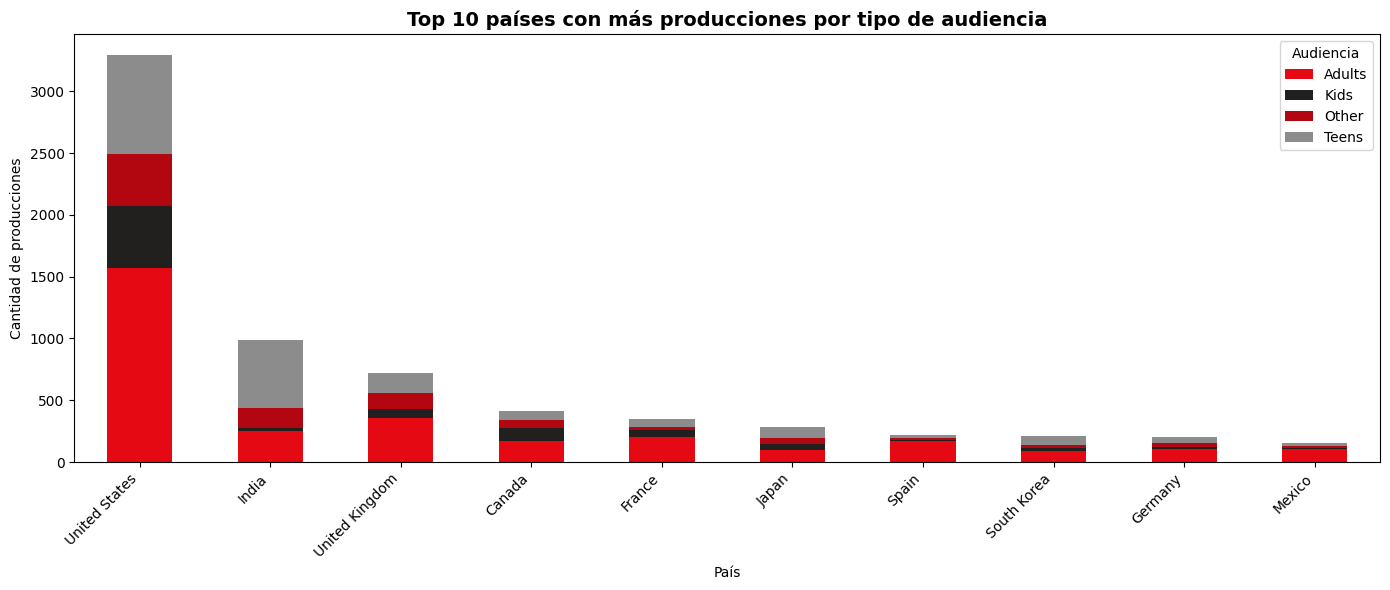

In [17]:
# Definir clasificación de audiencias
audience_map = {
    "Kids": ["TV-Y", "TV-Y7", "G", "PG"],
    "Teens": ["PG-13", "TV-14"],
    "Adults": ["R", "NC-17", "TV-MA"]
}

def classify_audience(rating):
    for key, values in audience_map.items():
        if rating in values:
            return key
    return "Other"

df["audience"] = df["rating"].apply(classify_audience)

# Expandir países (varios por fila)
df["country_split"] = df["country"].str.split(", ")
df_explode = df.explode("country_split")

# Agrupar por país y audiencia
audience_country = df_explode.groupby(["country_split", "audience"]).size().unstack(fill_value=0)

# Seleccionar los 10 países con más producciones
top_countries = audience_country.sum(axis=1).sort_values(ascending=False).head(10)
top_audience_data = audience_country.loc[top_countries.index]

# Paleta de colores
colors = ['#e50914', '#221f1f', '#b20710', '#8c8c8c']  # rojo Netflix, negro y bordo y agregamos un gris que no etsaba en la gama de colores porque no se visualisaba en blanco

# Gráfico de barras apiladas
top_audience_data.plot(kind="bar", stacked=True, figsize=(14,6), color=colors)

# Títulos y etiquetas
plt.title("Top 10 países con más producciones por tipo de audiencia", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de producciones")
plt.xlabel("País")

# Leyenda
plt.legend(title="Audiencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Parte 6
¿Se identifica alguna estacionalidad en los estrenos según la
categoría (listed in)? Qué meses concentran más lanzamientos?

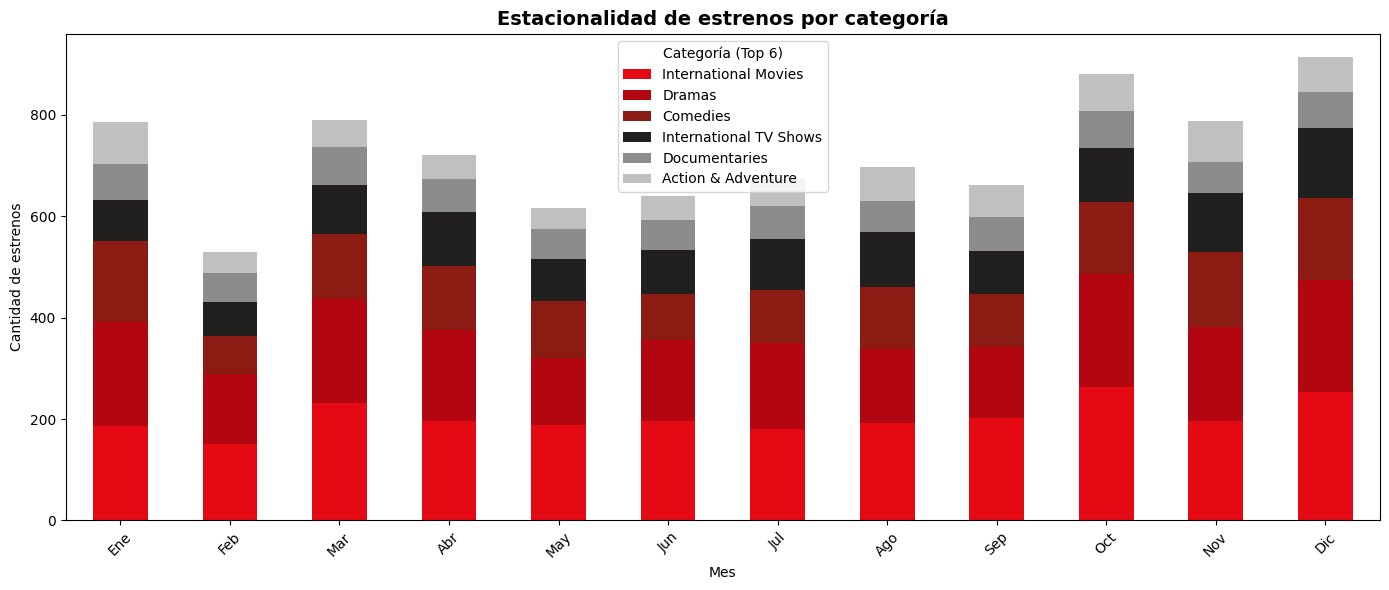

In [ ]:

# Extraer mes de estreno
df['month_added'] = pd.to_datetime(df['date_added'], errors="coerce").dt.month

# Expandir categorías (puede haber varias en listed_in separadas por coma)
df['listed_split'] = df['listed_in'].str.split(", ")
df_explode = df.explode('listed_split')

# Agrupar por mes y categoría
monthly_releases = df_explode.groupby(['month_added', 'listed_split']).size().unstack(fill_value=0)

# Ordenar meses de 1 a 12
monthly_releases = monthly_releases.sort_index()

# Paleta de 6 colores Netflix-style
colors = ["#e50914", "#b20710","#8c1c13", "#221f1f", "#8c8c8c", "#c0c0c0"]

# Seleccionar las 6 categorías más frecuentes
top_categories = monthly_releases.sum().sort_values(ascending=False).head(6).index
monthly_top = monthly_releases[top_categories]

# Gráfico de barras apiladas
monthly_top.plot(kind="bar", stacked=True, figsize=(14,6), color=colors)

# Títulos y etiquetas
plt.title("Estacionalidad de estrenos por categoría", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de estrenos")
plt.xlabel("Mes")
plt.xticks(range(12), 
           ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"], 
           rotation=45)

# Leyenda
plt.legend(title="Categoría (Top 6)")
plt.tight_layout()
plt.show()

# Parte 7
¿Qué directores tienen más títulos? ¿Se concentran en algún tipo de contenido o en una audiencia específica?

# Parte 8
¿Cuáles son los actores más populares?


# Parte 9
¿Cuál es la distribución en duración en series y películas?

# Parte 10
¿Hay palabras que se utilicen más que otras en títulos y descripciones?